# Dataset Preparation (Sensor Grid Dataset)

The following steps are carried out for the dataset preparation purpose:
1. Random split sensor grid dataset into training and testing with a ratio of 9:1, with a random_state = 0
    - training size = 405587
    - testing size = 45066
2. Check the location and currents distribution in training and testing datasets

## Outputs:
- Training dataset:`../Data/train.npy`
- Testing dataset: `../Data/test.npy`

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from functions import file_handler, functions_plot

import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')

# Loading Same Data as Deep Fluids

In deep fluids, a sample consists in a current vector and a vector field. We therefore split the test set on current vectors and not on individual field measurements as is done here.

In [2]:
currents = file_handler.get_currents()
currents[222,:]

array([-33.19125959,  -9.22064956,  33.70385746, -12.9183089 ,
        17.84245769, -30.38754973,  14.71923127,  25.67068718])

In [3]:
idx_train = np.loadtxt('/home/samuelch/src/deep-fluids/data/cmag_dataset/idx_train.txt', dtype=np.int)
idx_test = np.loadtxt('/home/samuelch/src/deep-fluids/data/cmag_dataset/idx_test.txt', dtype=np.int)
assert(list(set(idx_train).union(set(idx_test))) == range(len(currents)))
# idx_train = np.loadtxt('/home/samuelch/src/deep-fluids/data/cmag_high_currents/idx_train.txt', dtype=np.int)
# idx_test = np.loadtxt('/home/samuelch/src/deep-fluids/data/cmag_high_currents/idx_test.txt', dtype=np.int)
# assert(list(set(idx_train).union(set(idx_test))) == range(len(currents)))

In [4]:
len(currents)

3590

In [7]:
# We load the train/test split that we used in DeepFluids
# The samples are organized by current samples and not individual magnetic field samples
train_data = np.zeros((len(idx_train) * 119, 14), np.float)
for i, idx in enumerate(idx_train):
    train_data[i*119:(i+1)*119, :] = data.values[(idx*119):((idx+1)*119),:]
train_data = pd.DataFrame(data=train_data, columns=data.columns)
test_data = np.zeros((len(idx_test) * 119, 14), np.float)
for i, idx in enumerate(idx_test):
    test_data[i*119:(i+1)*119, :] = data.values[(idx*119):((idx+1)*119),:]
test_data = pd.DataFrame(data=test_data, columns=data.columns)

In [17]:
test_currents = np.unique(test_data[['I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8']].values, axis=0)

(array([11., 14., 19., 43., 51., 60., 37., 33., 42., 49.]),
 array([ 4.01425957,  7.10124516, 10.18823075, 13.27521634, 16.36220193,
        19.44918751, 22.5361731 , 25.62315869, 28.71014428, 31.79712987,
        34.88411546]),
 <a list of 10 Patch objects>)

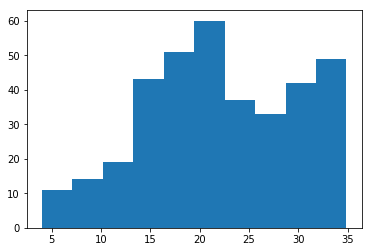

In [19]:
plt.hist(np.max(np.abs(test_currents),axis=1))

In [11]:
import scipy.io
# X_test.mat is used in MATLAB to test the baseline MPEM model
scipy.io.savemat('baseline_model/magnetic_model/CalibrateSystem_CardioMag_retrained_w_SensorGrid/X_test.mat', {'X_test': test_data.values})
np.save("../Data/train.npy", train_data)
np.save("../Data/test.npy", test_data)

## Check the split dataset

In [12]:
train_loaded = np.load("../Data/train.npy")
test_loaded = np.load("../Data/test.npy")

print(np.array_equal(train_data, train_loaded))
print(np.array_equal(test_data, test_loaded))

True
True


238 sensor locations are selected for training, and 238 sensor locations are selected for testing.


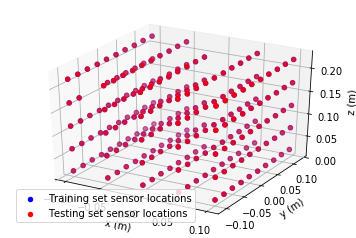

In [13]:
# sensor locations

train_sensor_locations = np.vstack({tuple(row) for row in train_data.values[:,0:3]})
test_sensor_locations = np.vstack({tuple(row) for row in test_data.values[:,0:3]})

print("{} sensor locations are selected for training, and {} sensor locations are selected for testing."\
      .format(len(train_sensor_locations), len(test_sensor_locations)))

functions_plot.plot_3D_coordinates([train_sensor_locations, test_sensor_locations],
                                   ["Training set sensor locations", "Testing set sensor locations"])

Since both training set and testing set have sensors from same locations, so they are overlapping. Only one colour (the last colour drawn) can be seen. 

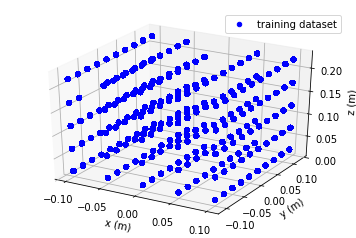

In [14]:
functions_plot.plot_3D_coordinates([train_data.values[:, 0:3]], ["training dataset"])

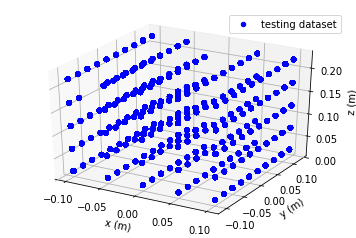

In [15]:
functions_plot.plot_3D_coordinates([test_data.values[:, 0:3]], ["testing dataset"])